In [98]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### ***Intialize Libraries***

In [99]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

***Load the DaraSet = Diamond.csv***

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/diamonds.csv')

In [101]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


***Exploratory Data Analysis***

In [102]:
df.shape

(53940, 10)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [104]:
df.rename(columns={"depth":"dpt_prcnt","x":"length","y":"width","z":"depth"},inplace = True)

In [105]:
df.describe()

,carat,dpt_prcnt,table,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [106]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
dpt_prcnt    0
table        0
price        0
length       0
width        0
depth        0
dtype: int64

In [107]:
df.isin([0]).sum()

carat         0
cut           0
color         0
clarity       0
dpt_prcnt     0
table         0
price         0
length        8
width         7
depth        20
dtype: int64

In [108]:
cat_var=df.select_dtypes(include=['object']).columns
print('Number of Categorical Columns: ',len(cat_var))
df[cat_var].head(3)

Number of Categorical Columns:  3


,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1


In [109]:
num_var=df.select_dtypes(include=['number']).columns
print('Number of Numerical Columns: ',len(num_var))
df[num_var].head(2)

Number of Numerical Columns:  7


,carat,dpt_prcnt,table,price,length,width,depth
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31


### ***vizualization***

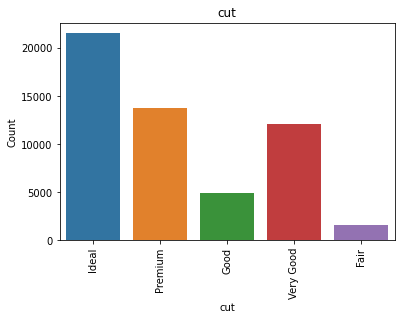

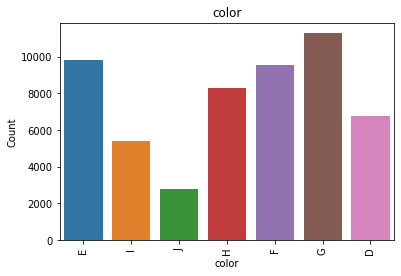

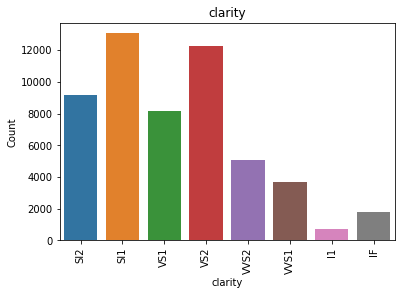

In [110]:
for i in cat_var:
    sns.countplot(x=df[i], data=df)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.xticks(rotation = 90)
    plt.show()




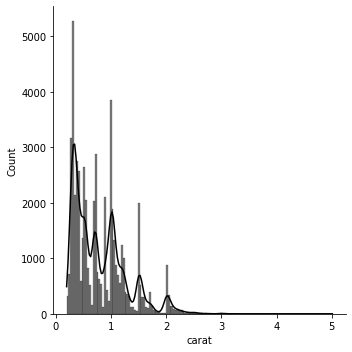

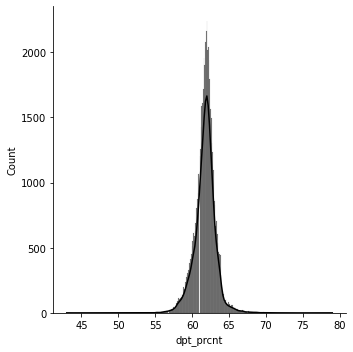

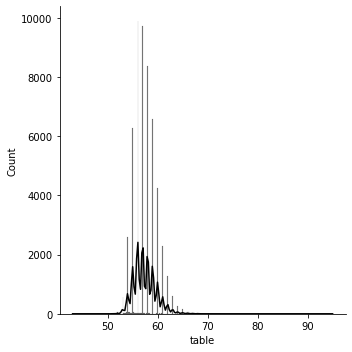

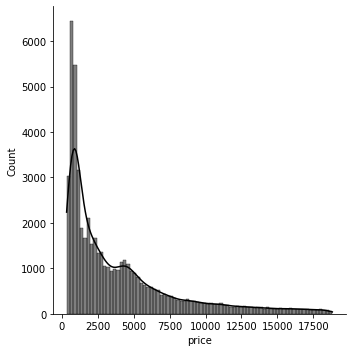

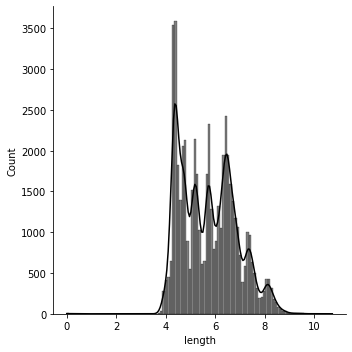

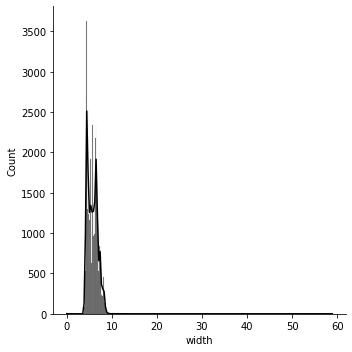

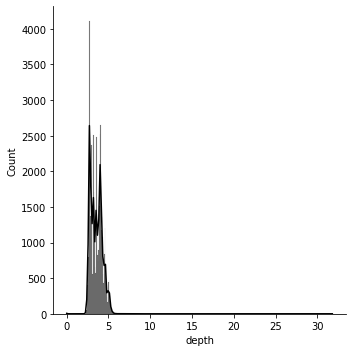

In [111]:
for i in num_var:
    df=df.copy()
    sns.displot(df[i], kde=True,color='black')
    plt.show()

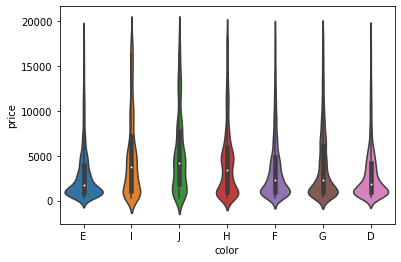

In [112]:
#Color Vs Price
sns.violinplot(x='color', y='price', data=df)

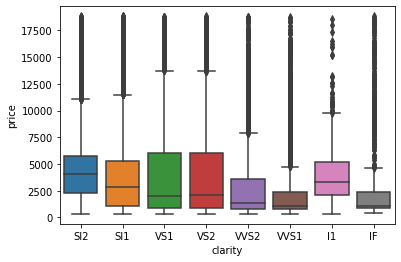

In [113]:
#Clarty Vs Price
sns.boxplot(x='clarity',y='price',data=df)

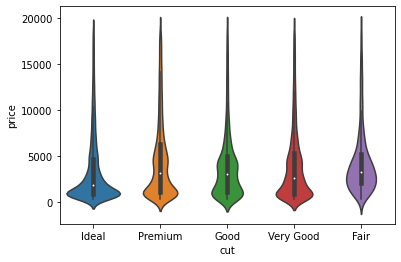

In [114]:
sns.violinplot(x='cut',y='price',data=df)

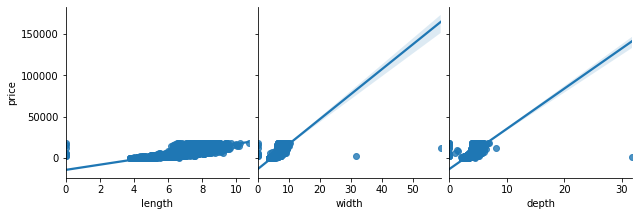

In [115]:
sns.pairplot(df , height=3, aspect =1, x_vars = ['length','width','depth'] , y_vars =  ['price'] , kind = 'reg')

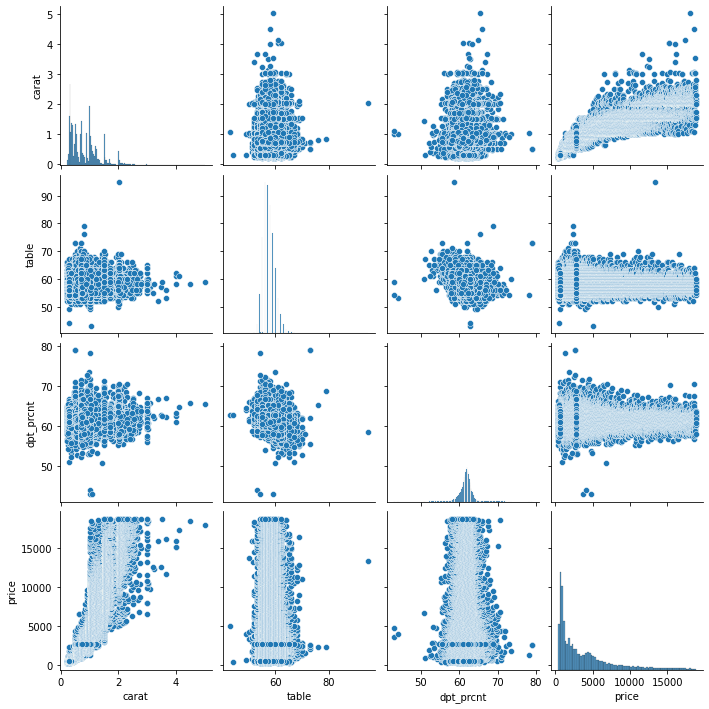

In [116]:
sns.pairplot(data = df,vars=['carat', 'table', 'dpt_prcnt','price'])
plt.show()

In [117]:
df.corr()

,carat,dpt_prcnt,table,price,length,width,depth
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
dpt_prcnt,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
length,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
width,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
depth,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


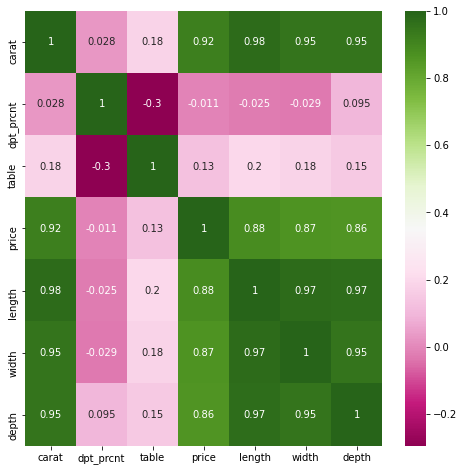

In [118]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap="PiYG")
plt.show()

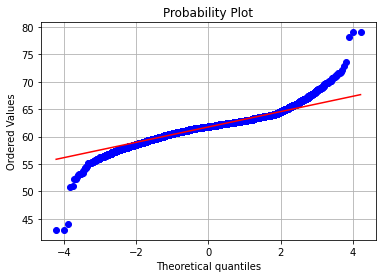

In [119]:
stats.probplot(df["dpt_prcnt"],dist="norm",plot=plt)
plt.grid()

### ***Encoding***

In [120]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [121]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [122]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [123]:
df['cut'] = df.cut.map({'Ideal':4, 'Premium':3, 'Good':1, 'Very Good':2, 'Fair':0})

In [124]:
df['color'] = df.color.map({'D':6,'E':5,'F':4,'G':3,'H':2,'I':1,'J':0})

In [125]:
df['clarity'] = df.clarity.map({'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7})

### ***Normalize Data***

In [126]:
nrmlz_var = ['carat','dpt_prcnt','table','length','width','depth'] 

In [127]:

df[nrmlz_var] = df[nrmlz_var].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [128]:
df[nrmlz_var].head(3)

,carat,dpt_prcnt,table,length,width,depth
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642


In [129]:
df.head(5)

,carat,cut,color,clarity,dpt_prcnt,table,price,length,width,depth
0,0.006237,4,5,1,0.513889,0.230769,326,0.367784,0.067572,0.076415
1,0.002079,3,5,2,0.466667,0.346154,326,0.362197,0.065195,0.072642
2,0.006237,1,5,4,0.386111,0.423077,327,0.377095,0.069100,0.072642
3,0.018711,3,1,3,0.538889,0.288462,334,0.391061,0.071817,0.082704
4,0.022869,1,0,1,0.563889,0.288462,335,0.404097,0.073854,0.086478


In [130]:
df.shape

(53940, 10)

***Splitting of data into Test & Train***

In [131]:
target = df.price
trn_df=df.drop('price',axis=1)
print(trn_df.shape)
print(target.shape)

(53940, 9)
(53940,)


In [132]:
trn_df_split = 0.75

***KNN Algorithem***

In [133]:
size = trn_df.shape[0]
X_train = trn_df[:int(trn_df_split * size)]
X_test = trn_df[int(trn_df_split * size):]
y_train = target[:int(trn_df_split * size)]
y_test = target[int(trn_df_split * size):]

In [134]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((40455, 9), (13485, 9), (40455,), (13485,))

In [135]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

***NUMPY Broadcasting***

In [136]:
distance=np.zeros(y_test.shape)
y_pred=np.zeros(y_test.shape)
k=3
for i in range(len(X_test)):
    distance=np.sqrt(np.sum((X_train - X_test[i])**2,axis=1 ))
    sort_value=(np.argsort(distance))
    sort_val=sort_value[:k]
    y_pred[i]=y_train[sort_val].mean()
print(y_pred)

[ 903.         1070.          903.         ... 3044.33333333 3105.
 2905.66666667]


In [137]:
len(y_pred)

13485

In [138]:
len(sort_val)

3

***Evalution***

In [139]:
MSE = np.mean((y_test - y_pred)**2)
RMSE=np.sqrt(np.mean((y_test - y_pred)**2))
MAE=np.mean(np.abs(y_test - y_pred))
R2_score=1-(np.sum((y_test-y_pred)**2))/(np.sum((y_test-np.mean(y_train))**2))
print(MSE)
print(RMSE)
print(MAE)
print(R2_score*100)

544516.9542948956
737.9139206539579
587.8457051044371
93.88014841133298


## ***Using SKlearn Library***

In [152]:
from sklearn.preprocessing import MinMaxScaler
std_data = MinMaxScaler().fit_transform(trn_df)
print(std_data.shape)

(53940, 9)


In [154]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(std_data,target,test_size = 0.25,random_state=0)

In [155]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()
reg.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

***Prediction***

In [156]:
y_pred = reg.predict(X_test)

In [157]:
print(y_pred)

[4664.4 6809.8 5458.2 ... 3383.2 2804.  1386.8]


***Evalutuon Of Model By Matrics***

In [161]:
from sklearn import metrics  
MSR = metrics.mean_squared_error(Y_test,y_pred)
MSR

548172.0271294031

In [160]:
import math as m
RMSR = m.sqrt(metrics.mean_squared_error(Y_test,y_pred))
RMSR 

740.3864039333806

In [163]:
MAR = metrics.mean_absolute_error(Y_test,y_pred) 
MAR   

369.3519021134594

In [164]:
R2_SCR = metrics.r2_score(Y_test,y_pred)
R2_SCR

0.9656780447045803

***Evalution Comparision b/w KNN Scratch to KNN_Reg By Sklearn Libraby***

In [166]:
print(MSE,RMSE,MAE,R2_score)      #from Scratch
print(MSR,RMSR,MAR,R2_SCR)        #by sklearn Library

544516.9542948956 737.9139206539579 587.8457051044371 0.9388014841133299
548172.0271294031 740.3864039333806 369.3519021134594 0.9656780447045803
